# Kunskapskontroll

### Fyll i uppgifterna nedan innan du lämnar in på LearnPoint: 
Namn på samtliga gruppmedlemmar: 

Marcus Turesson, Pontus Paulsson, Jonathan Karlsson, Rasmus Hellgren, Tommy Wang

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
# Below, set your own path where you have stored the data file. 
housing = pd.read_csv("housing.csv")

In [3]:
raw_df = pd.DataFrame(housing)

## EDA

In [4]:
raw_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df = raw_df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Total_bedrooms is missing values so we are dropping those columns to clean the dataset

### Remove all houses where price is 500001

In [7]:
less_than_500001 = df[df["median_house_value"] <= 500000]
# Check so that it worked
less_than_500001[less_than_500001["median_house_value"] > 500000]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [8]:
df = less_than_500001
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[19475 rows x 10 columns]

### View a graph of all houses

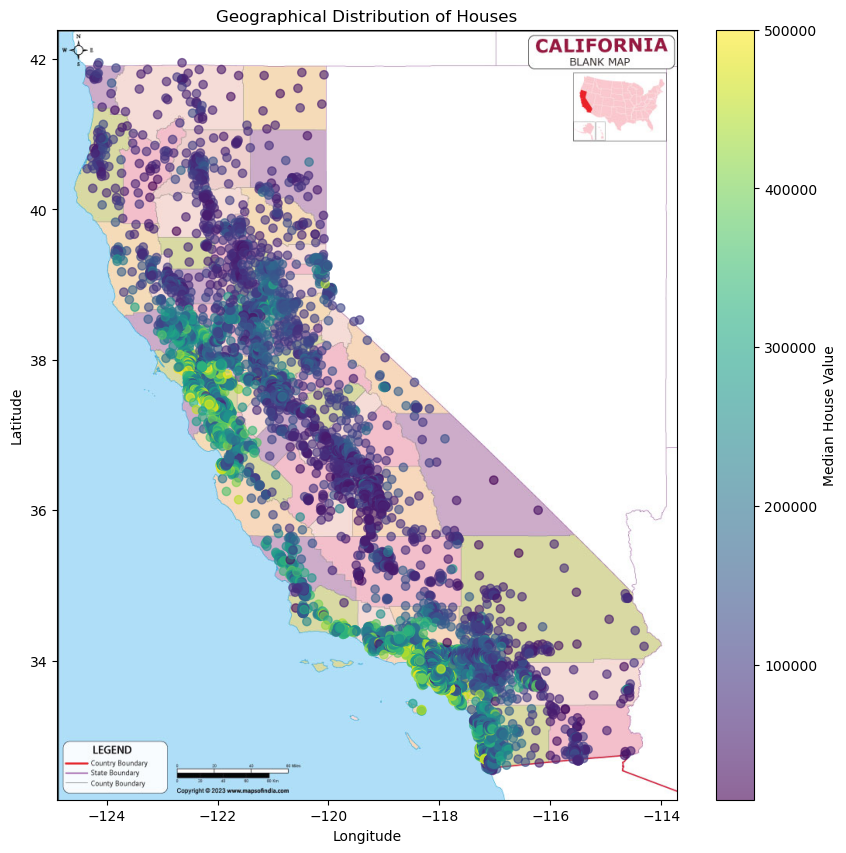

In [9]:
plt.figure(figsize=(10, 10))

# Backgroud image
background_img = mpimg.imread('./pictures/california-map.jpg')
extent = [-124.48, -114.13, 32.53, 42.01]
scale_factor = 1.08  # Adjust the scale factor as needed for the desired enlargement
new_extent = [
    extent[0] - (extent[1] - extent[0]) * (scale_factor - 1) / 2,
    extent[1] + (extent[1] - extent[0]) * (scale_factor - 1) / 2,
    extent[2] - (extent[3] - extent[2]) * (scale_factor - 1) / 2,
    extent[3] + (extent[3] - extent[2]) * (scale_factor - 1) / 2
]
plt.imshow(background_img, extent=new_extent, aspect='auto')

# Scatter plot
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Houses')
plt.show()

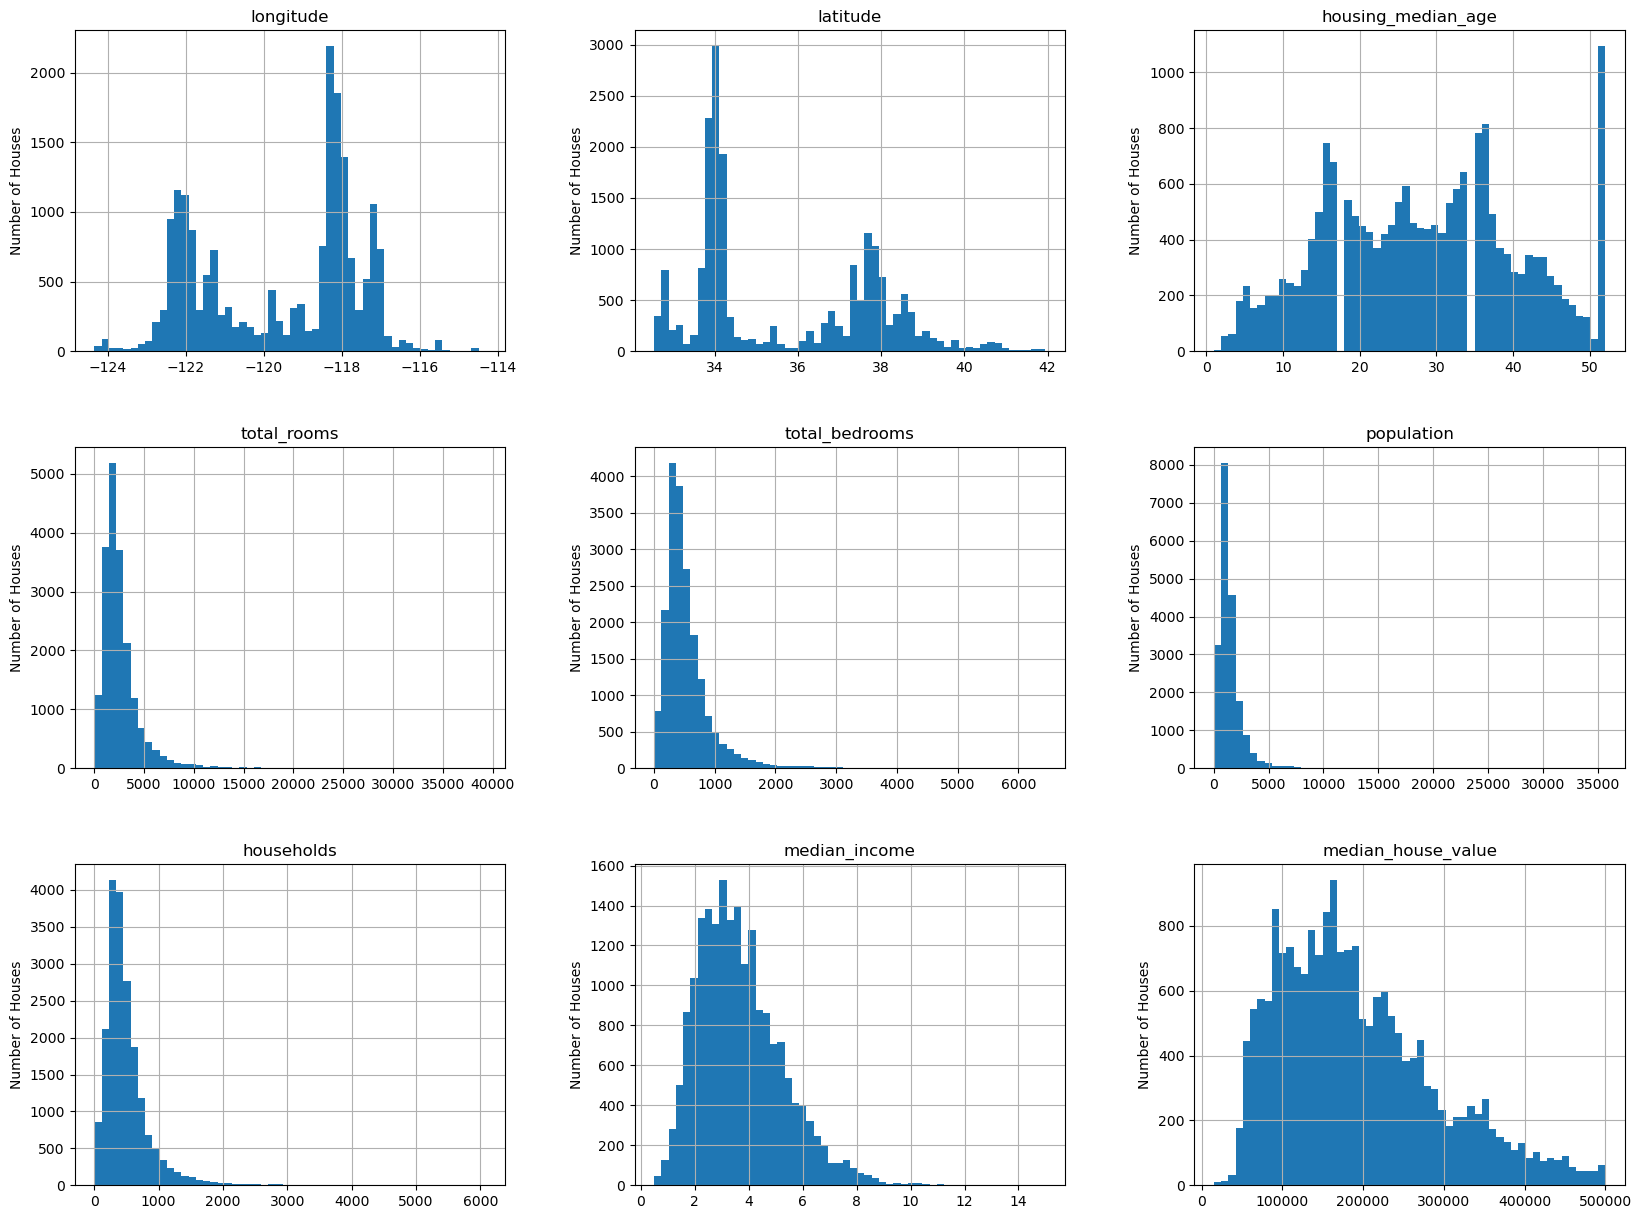

In [10]:
# Histogrammen hjälper till att förstå fördelningen och spridningen av de numeriska variablerna i datasetet.

df.hist(bins=54, figsize=(20, 15)) # Skapar histogram för alla numeriska kolumner i df och en figurstorlek på 20x15.

for ax in plt.gcf().axes:
    ax.set_ylabel('Number of Houses')

plt.show()

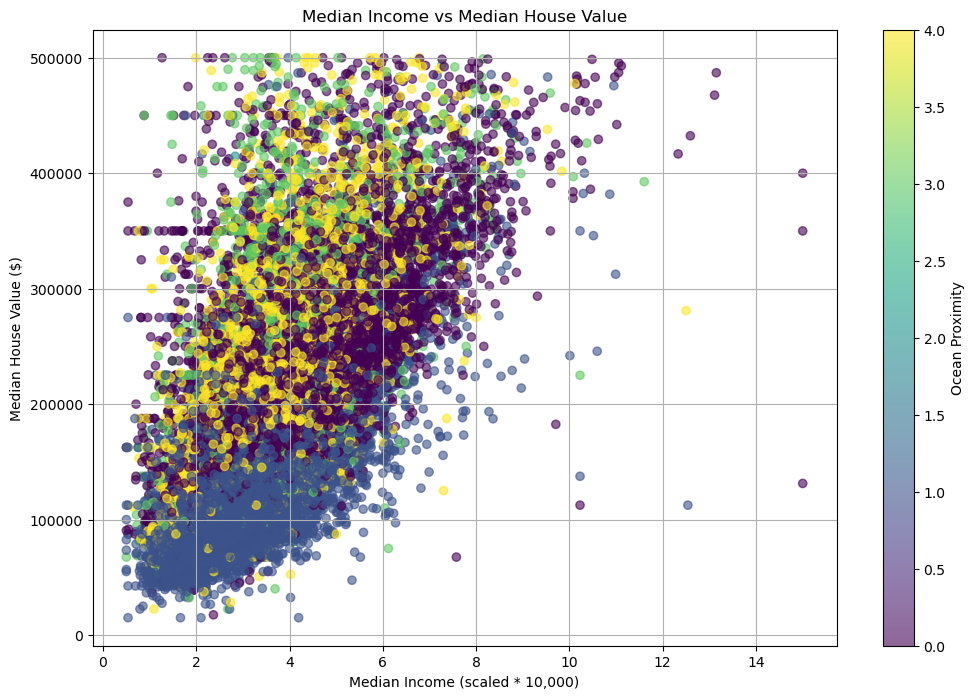

In [11]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['median_income'], df['median_house_value'], 
                      c=df['ocean_proximity'].astype('category').cat.codes, # astype('category').cat.codes konverterar kategoriska värden till numeriska koder för färgning.
                      cmap='viridis', alpha=0.6) # Alpha är satt till 0.6 för att hantera överlappande punkter och göra plottet mer läsbart.
plt.colorbar(scatter, label='Ocean Proximity') # Genom att använda färg för att visa ocean_proximity kan vi se om närheten till havet påverkar husvärden.
plt.xlabel('Median Income (scaled * 10,000)')
plt.ylabel('Median House Value ($)')
plt.title('Median Income vs Median House Value')
plt.grid(True)

plt.show()

In [12]:
X = housing.drop(columns=['median_house_value'], axis=1)
y = housing['median_house_value']
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.2, random_state=56)

In [13]:
# Assuming df is your DataFrame
# Let's select the relevant columns for the features and target variable
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income']]
y = df['median_house_value'] 

In [14]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8984     -118.44     33.99                44.0        305.0            72.0   
7435     -118.19     33.95                44.0       1436.0           271.0   
7882     -118.12     33.88                36.0       1083.0           218.0   
7341     -118.14     33.97                29.0       1846.0           530.0   
10333    -117.75     33.83                14.0       2452.0           296.0   

       population  households  median_income ocean_proximity  
8984        156.0        70.0         5.9641       <1H OCEAN  
7435        850.0       269.0         3.2768       <1H OCEAN  
7882        557.0       210.0         3.0795       <1H OCEAN  
7341       2576.0       528.0         2.6300       <1H OCEAN  
10333       954.0       275.0         8.2375       <1H OCEAN

In [15]:
X_train.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.560882     35.624597           28.632510   2638.567466   
std        2.001688      2.133791           12.584608   2158.357415   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.250000           29.000000   2141.000000   
75%     -118.000000     37.710000           37.000000   3159.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    16339.000000  16512.000000  16512.000000   16512.000000  
mean       537.972887   1424.497396    499.638748       3.879855  
std        416.446336   1115.921031    377.968530       1.906836  
min          1.000000      3.000000      1.000000       0.499900  
25%        297.000000    790.000000    281.000000       2.566775  
50%        436.000000   1170.000000    410.500000       3.544550  
75%        648.000000   1727.250000    606.000000       4.763900  
max       6210.000000  35682.000000   5358.000000      15.000100

C:\Users\pauls\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauls\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauls\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauls\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 500x500 with 0 Axes>

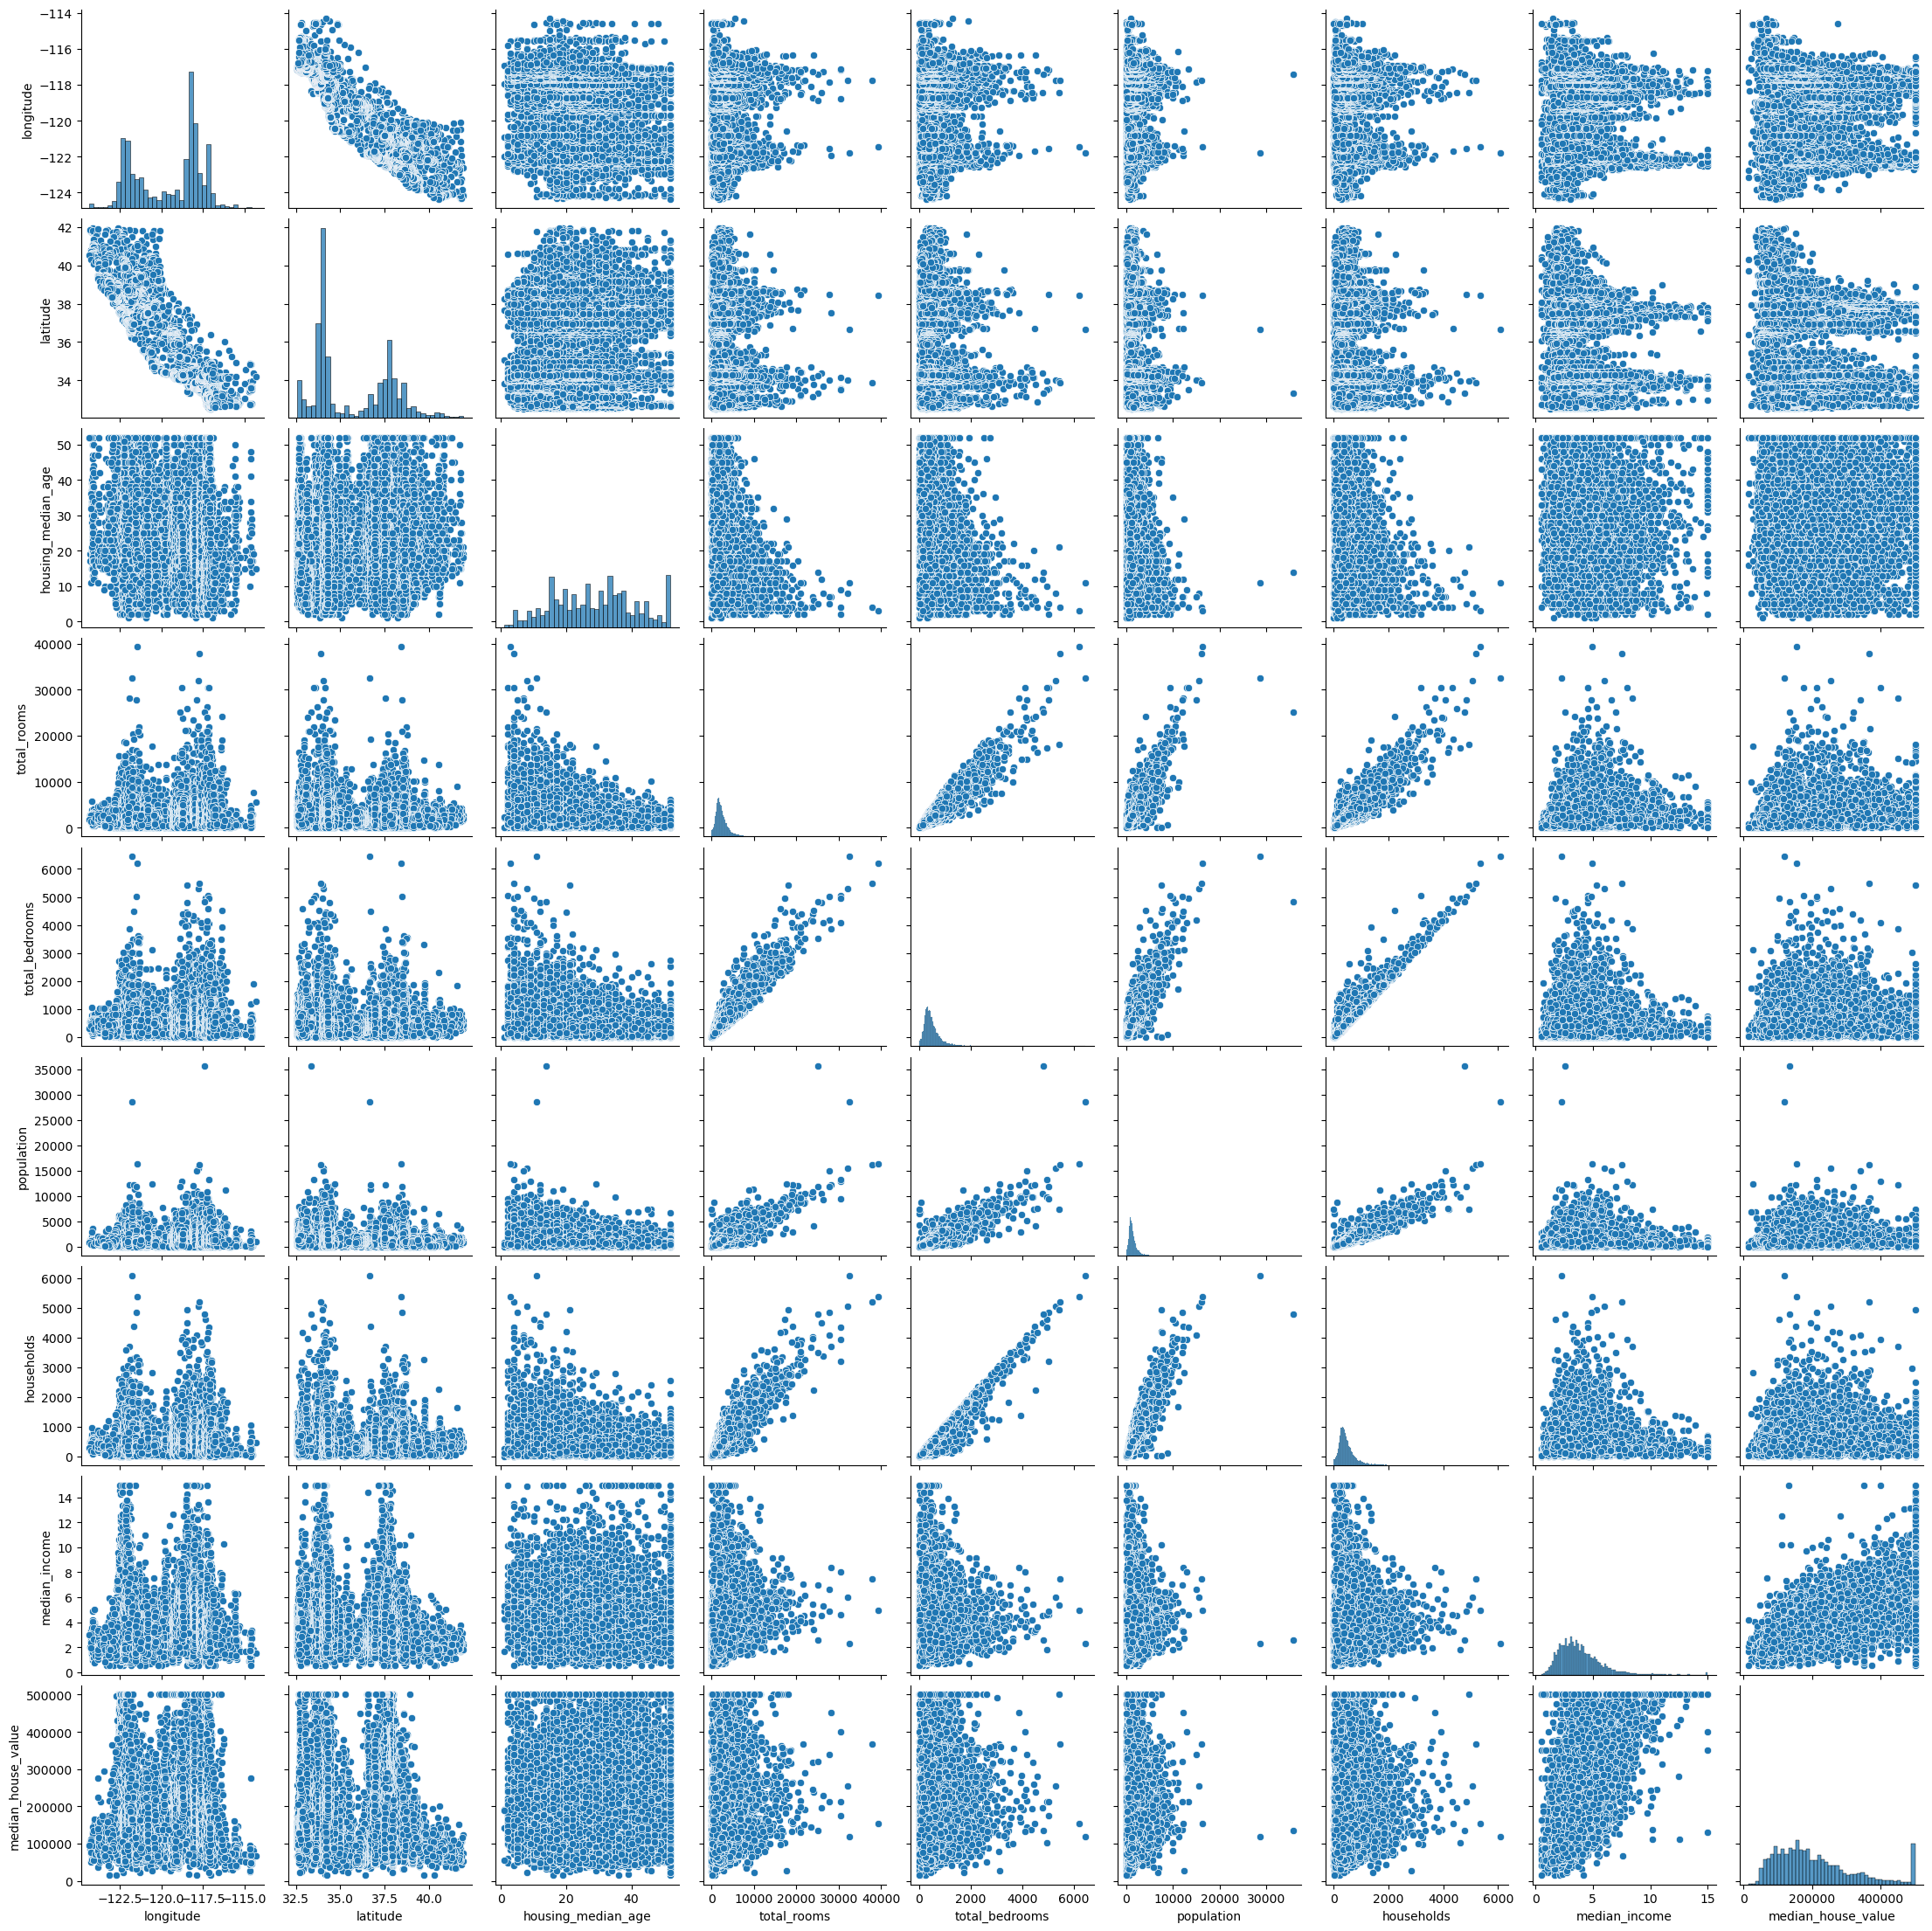

In [20]:
plt.figure(figsize=(5,5))
sns.pairplot(housing)
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("\nTraining data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (15580, 6)
Testing data size: (3895, 6)


In [18]:
# Fit the training data to a Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Show your regression model's score
train_score = regression_model.score(X_train, y_train)
test_score = regression_model.score(X_test, y_test)
print(f'\nTraining score: {train_score}')
print(f'Testing score: {test_score}')


Training score: 0.5712260188139325
Testing score: 0.5719110859199081


In [19]:
# Get the coefficients and intercept of the trained regression model
coefficients = regression_model.coef_
intercept = regression_model.intercept_

# Select three samples from the testing set
samples_to_predict = X_test

# Manually calculate the predictions without using loops
predictions = np.dot(samples_to_predict.values, coefficients.reshape(-1, 1)).flatten() + intercept

# Get the actual data for the selected samples from the dataset
actual_data = y_test

# Print the predictions and actual data
for pred, actual in zip(predictions, actual_data):
    print("Prediction:", pred)
    print("Actual data:", actual)
    acc = regression_model.score(X_test, y_test)
    print(acc*100, '%')
    print()

Prediction: 305178.6020819843
Actual data: 313000.0
57.19110859199081 %

Prediction: 71360.76165095624
Actual data: 122400.0
57.19110859199081 %

Prediction: 157056.15294172382
Actual data: 93800.0
57.19110859199081 %

Prediction: 168134.00075727282
Actual data: 198800.0
57.19110859199081 %

Prediction: 169052.97139992798
Actual data: 162500.0
57.19110859199081 %

Prediction: 154214.5381707996
Actual data: 117600.0
57.19110859199081 %

Prediction: 179185.78102089744
Actual data: 155400.0
57.19110859199081 %

Prediction: 81533.34113428416
Actual data: 104200.0
57.19110859199081 %

Prediction: 277417.87703827536
Actual data: 260900.0
57.19110859199081 %

Prediction: 199828.92037271708
Actual data: 236200.0
57.19110859199081 %

Prediction: 200536.78399796365
Actual data: 184500.0
57.19110859199081 %

Prediction: 161937.98361244844
Actual data: 113600.0
57.19110859199081 %

Prediction: 98833.19481762173
Actual data: 75300.0
57.19110859199081 %

Prediction: 100827.72628052533
Actual data: 1